In [93]:
import pandas as pd
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
 
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [94]:
 
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [95]:

validation = (x_test, y_test)

In [96]:
model_hybrid = models.Sequential()
model_hybrid.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_hybrid.add(layers.Dense(32, activation='relu'))
model_hybrid.add(layers.Dense(1, activation='sigmoid'))

In [97]:
model_hybrid.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = ['acc'])

In [98]:
history = model_hybrid.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data = validation)

Epoch 1/10
782/782 [==============================] - 5s 6ms/step - loss: 0.6298 - acc: 0.6635 - val_loss: 0.3882 - val_acc: 0.8409
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.3509 - acc: 0.8595 - val_loss: 0.3280 - val_acc: 0.8624
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2771 - acc: 0.8863 - val_loss: 0.3071 - val_acc: 0.8739
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2389 - acc: 0.9072 - val_loss: 0.2948 - val_acc: 0.8797
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.2144 - acc: 0.9183 - val_loss: 0.4244 - val_acc: 0.8282
Epoch 6/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1975 - acc: 0.9251 - val_loss: 0.3195 - val_acc: 0.8701
Epoch 7/10
782/782 [==============================] - 3s 4ms/step - loss: 0.1843 - acc: 0.9307 - val_loss: 0.3139 - val_acc: 0.8759
Epoch 8/10
782/782 [==============================] - 3s 4ms/step - loss: 0.

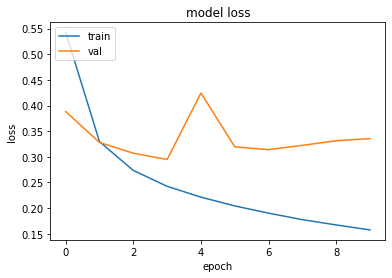

<Figure size 1080x720 with 0 Axes>

In [99]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure(figsize = (15,10))
plt.show()

In [100]:
a = np.array(model_hybrid.get_weights())
print(a)

[array([[ 0.01386063, -0.00099793,  0.00278381, ...,  0.01467112,
        -0.01540023, -0.01751613],
       [ 0.02007913, -0.02760625,  0.02610821, ...,  0.03326672,
         0.03534952,  0.02705991],
       [ 0.05202335,  0.00624746,  0.00815381, ...,  0.04089495,
         0.03316626,  0.05625294],
       ...,
       [-0.0109465 , -0.01423397, -0.00501794, ..., -0.01938338,
         0.00068247,  0.01095451],
       [-0.00539245,  0.00260965, -0.00884097, ..., -0.02302874,
         0.01564607,  0.02506809],
       [ 0.00864482, -0.01453773, -0.01152436, ...,  0.01323029,
         0.00337679, -0.00038337]], dtype=float32)
 array([ 0.03106665, -0.01174491,  0.01508769,  0.0498174 ,  0.00927235,
        0.03527131, -0.00245597,  0.03380682,  0.00684413,  0.02115115,
        0.02848884,  0.01633403,  0.00146984, -0.00730715, -0.00593333,
       -0.00508926,  0.04219392, -0.00117242,  0.00298185,  0.02748593,
       -0.00196472, -0.00094441,  0.04993965,  0.03819178,  0.03819894,
       -0.

c:\users\sharm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [101]:
model_hybrid.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [102]:
model_hybrid.set_weights(a)

In [103]:
b = np.array(model_hybrid.get_weights())
print(b)

[array([[ 0.01386063, -0.00099793,  0.00278381, ...,  0.01467112,
        -0.01540023, -0.01751613],
       [ 0.02007913, -0.02760625,  0.02610821, ...,  0.03326672,
         0.03534952,  0.02705991],
       [ 0.05202335,  0.00624746,  0.00815381, ...,  0.04089495,
         0.03316626,  0.05625294],
       ...,
       [-0.0109465 , -0.01423397, -0.00501794, ..., -0.01938338,
         0.00068247,  0.01095451],
       [-0.00539245,  0.00260965, -0.00884097, ..., -0.02302874,
         0.01564607,  0.02506809],
       [ 0.00864482, -0.01453773, -0.01152436, ...,  0.01323029,
         0.00337679, -0.00038337]], dtype=float32)
 array([ 0.03106665, -0.01174491,  0.01508769,  0.0498174 ,  0.00927235,
        0.03527131, -0.00245597,  0.03380682,  0.00684413,  0.02115115,
        0.02848884,  0.01633403,  0.00146984, -0.00730715, -0.00593333,
       -0.00508926,  0.04219392, -0.00117242,  0.00298185,  0.02748593,
       -0.00196472, -0.00094441,  0.04993965,  0.03819178,  0.03819894,
       -0.

c:\users\sharm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [104]:
np.array_equal(a, b)

False

In [105]:
history = model_hybrid.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data = validation)

Epoch 1/10
782/782 [==============================] - 5s 5ms/step - loss: 0.2195 - acc: 0.9115 - val_loss: 0.3135 - val_acc: 0.8695
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1334 - acc: 0.9474 - val_loss: 0.3597 - val_acc: 0.8646
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0772 - acc: 0.9716 - val_loss: 0.4123 - val_acc: 0.8626
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0390 - acc: 0.9871 - val_loss: 0.6214 - val_acc: 0.8530
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0129 - acc: 0.9970 - val_loss: 0.7633 - val_acc: 0.8496
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0133 - acc: 0.9959 - val_loss: 0.7518 - val_acc: 0.8564
Epoch 7/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0106 - acc: 0.9973 - val_loss: 0.8675 - val_acc: 0.8607
Epoch 8/10
782/782 [==============================] - 4s 5ms/step - loss: 0.

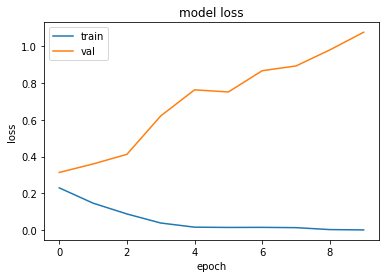

<Figure size 1080x720 with 0 Axes>

In [106]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure(figsize = (15,10))
plt.show()

In [ ]:
# RAN FROM HERE RIGHT NOW #######################

In [162]:
epochs =15

In [163]:
model_hybrid = models.Sequential()
model_hybrid.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_hybrid.add(layers.Dense(32, activation='relu'))
model_hybrid.add(layers.Dense(1, activation='sigmoid'))

In [164]:
validation = (x_test, y_test)
key = {1:'SGD', 2:'RMSprop', 3:'AdaGrad', 4:'AdaDelta', 5:'Adam', 6:'Nadam', 7:'Adamax'}

In [165]:
import keras
from matplotlib import pyplot as plt
plot_points=[]
plot_points2=[]
for i in range(epochs+1):
    j = (i % 7) + 1
    model_hybrid.compile(optimizer = key[j], loss = 
                         'binary_crossentropy', metrics = ['acc'])
    if i!=0:
        model_hybrid.set_weights(a)
    history = model_hybrid.fit(x_train, y_train, epochs = 1, batch_size = 512, validation_data = validation)
    a = np.array(model_hybrid.get_weights())
    plot_points.append(history.history['val_loss'])
    plot_points2.append(history.history['loss'])

49/49 [==============================] - 2s 41ms/step - loss: 0.6915 - acc: 0.5193 - val_loss: 0.6881 - val_acc: 0.5452


c:\users\sharm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


49/49 [==============================] - 4s 71ms/step - loss: 0.0897 - acc: 0.9712 - val_loss: 0.5128 - val_acc: 0.8602


In [176]:
plot_points[0]

[0.4014943242073059]

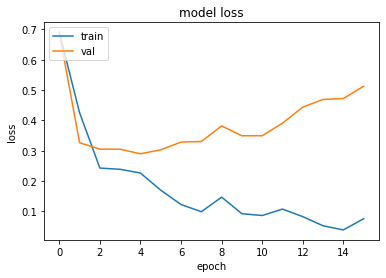

<Figure size 1080x720 with 0 Axes>

In [166]:
plt.plot(plot_points2)
plt.plot(plot_points)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure(figsize = (15,10))
plt.show()

In [167]:
model_hybrid = models.Sequential()
model_hybrid.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model_hybrid.add(layers.Dense(512, activation='relu'))
model_hybrid.add(layers.Dense(1, activation='sigmoid'))

In [168]:
validation = (x_test, y_test)
key = {1:'SGD', 2:'RMSprop', 3:'AdaGrad', 4:'AdaDelta', 5:'Adam', 6:'Nadam', 7:'Adamax'}

In [169]:
import keras
from matplotlib import pyplot as plt
plot_points=[]
plot_points2=[]
for i in range(epochs+1):
    j = (i % 7) + 1
    model_hybrid.compile(optimizer = key[j], loss = 
                         'binary_crossentropy', metrics = ['acc'])
    if i!=0:
        model_hybrid.set_weights(a)
    history = model_hybrid.fit(x_train, y_train, epochs = 1, batch_size = 32, validation_data = validation)
    a = np.array(model_hybrid.get_weights())
    plot_points.append(history.history['val_loss'])
    plot_points2.append(history.history['loss'])

782/782 [==============================] - 17s 21ms/step - loss: 0.6449 - acc: 0.6627 - val_loss: 0.4209 - val_acc: 0.8296


c:\users\sharm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


782/782 [==============================] - 40s 51ms/step - loss: 7.7830e-04 - acc: 0.9999 - val_loss: 2.8798 - val_acc: 0.8681


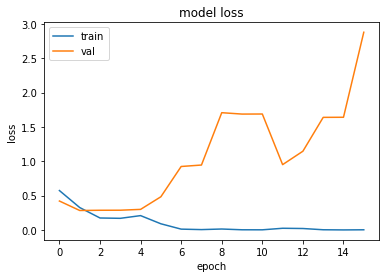

<Figure size 1080x720 with 0 Axes>

In [170]:
plt.plot(plot_points2)
plt.plot(plot_points)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure(figsize = (15,10))
plt.show()

In [171]:
model_hybrid = models.Sequential()
model_hybrid.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model_hybrid.add(layers.Dense(32, activation='relu'))
model_hybrid.add(layers.Dense(1, activation='sigmoid'))

In [172]:
validation = (x_test, y_test)
key = {1:'SGD', 2:'sgd', 3:'sgd', 4:'sgd', 5:'Adam', 6:'adam', 7:'adam'}

In [173]:
import keras
from matplotlib import pyplot as plt
plot_points=[]
plot_points2=[]
model_hybrid.save('HYBRID')
for i in range(epochs+1):
    j = (i % 7) + 1
    model_hybrid = tf.keras.models.load_model('HYBRID')
    model_hybrid.compile(optimizer = key[j], loss = 
                         'binary_crossentropy', metrics = ['acc'])
    if i!=0:
        model_hybrid.set_weights(a)
    history = model_hybrid.fit(x_train, y_train, epochs = 1, batch_size = 32, validation_data = validation)
    a = np.array(model_hybrid.get_weights())
    plot_points.append(history.history['val_loss'])
    plot_points2.append(history.history['loss'])

INFO:tensorflow:Assets written to: HYBRID\assets
782/782 [==============================] - 5s 6ms/step - loss: 0.6347 - acc: 0.6485 - val_loss: 0.4015 - val_acc: 0.8365


c:\users\sharm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


782/782 [==============================] - 8s 10ms/step - loss: 0.0087 - acc: 0.9970 - val_loss: 1.2845 - val_acc: 0.8644


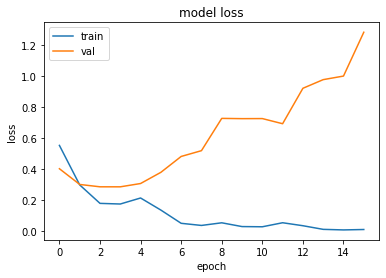

<Figure size 1080x720 with 0 Axes>

In [174]:
plt.plot(plot_points2)
plt.plot(plot_points)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure(figsize = (15,10))
plt.show()

In [ ]:
# RAN TILL HERE RIGHT NOW #######################

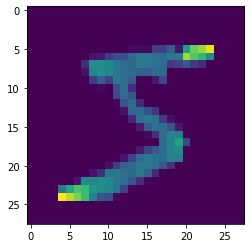

In [221]:
import tensorflow as tf
mnist= tf.keras.datasets.mnist #28x28 images
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#print(x_train[0])
plt.imshow(x_train[0])

x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0])

In [231]:
epochs = 30

In [232]:
model_hybrid=tf.keras.models.Sequential()
model_hybrid.add(tf.keras.layers.Flatten())
model_hybrid.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model_hybrid.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model_hybrid.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model_hybrid.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [233]:
validation = (x_test, y_test)
key = {1:'SGD', 2:'sgd', 3:'sgd', 4:'sgd', 5:'Adam', 6:'adam', 7:'adam'}

In [234]:
import keras
from matplotlib import pyplot as plt
plot_points=[]
plot_points2=[]
for i in range(epochs+1):
    j = (i % 7) + 1
    model_hybrid.compile(optimizer = key[j], loss = 
                         'sparse_categorical_crossentropy', metrics = ['accuracy'])
    if i!=0:
        model_hybrid.set_weights(a)
    history = model_hybrid.fit(x_train,y_train, epochs=1,batch_size=32,validation_data=(x_test, y_test))
    a = np.array(model_hybrid.get_weights())
    plot_points.append(history.history['val_loss'])
    plot_points2.append(history.history['loss'])

1875/1875 [==============================] - 5s 3ms/step - loss: 1.7087 - accuracy: 0.5513 - val_loss: 0.4163 - val_accuracy: 0.8858


c:\users\sharm\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


1875/1875 [==============================] - 6s 3ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.1058 - val_accuracy: 0.9814


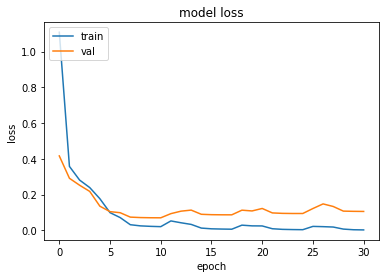

<Figure size 1080x720 with 0 Axes>

In [235]:
plt.plot(plot_points2)
plt.plot(plot_points)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure(figsize = (15,10))
plt.show()

In [ ]:
#model train with given epochs
original_hist=model.fit(x_train,y_train, epochs=20,batch_size=32,validation_data=(x_test, y_test))

In [44]:
validation = (x_test, y_test)
x1,x2,y=[],[],[list(range(1,epochs+1))]
key = {1:'SGD', 2:'RMSprop', 3:'AdaGrad', 4:'AdaDelta', 5:'Adam', 6:'Nadam', 7:'Adamax'}

In [45]:
import keras
from matplotlib import pyplot as plt
plot_points=[]
plot_points2=[]
model_hybrid.save('HYBRID')
for i in range(epochs+1):
    j = (i % 7) + 1
    if epoch!=1:
        
    model_hybrid = tf.keras.models.load_model('HYBRID')
    model_hybrid.compile(optimizer = key[j], loss = 
                         'binary_crossentropy', metrics = ['acc'])
    history = model_hybrid.fit(x_train, y_train, epochs = 1, batch_size = 512, validation_data = validation)
    model_hybrid.save('HYBRID')
    plot_points.append(history.history['val_loss'])
    plot_points2.append(history.history['loss'])
    print(history.history['acc'])
    print(history.history['val_acc'])

INFO:tensorflow:Assets written to: HYBRID\assets
49/49 [==============================] - 5s 99ms/step - loss: 0.6918 - acc: 0.5193 - val_loss: 0.6875 - val_acc: 0.5656
INFO:tensorflow:Assets written to: HYBRID\assets
[0.5367199778556824]
[0.5655999779701233]
49/49 [==============================] - 8s 153ms/step - loss: 0.6301 - acc: 0.7376 - val_loss: 0.2871 - val_acc: 0.8832
INFO:tensorflow:Assets written to: HYBRID\assets
[0.8050400018692017]
[0.8832399845123291]
49/49 [==============================] - 6s 106ms/step - loss: 0.1831 - acc: 0.9353 - val_loss: 0.2751 - val_acc: 0.8882
INFO:tensorflow:Assets written to: HYBRID\assets
[0.9389200210571289]
[0.888159990310669]
49/49 [==============================] - 8s 109ms/step - loss: 0.1756 - acc: 0.9395 - val_loss: 0.2745 - val_acc: 0.8884
INFO:tensorflow:Assets written to: HYBRID\assets
[0.9408800005912781]
[0.8884400129318237]
49/49 [==============================] - 6s 103ms/step - loss: 0.1783 - acc: 0.9323 - val_loss: 0.2944 - 

[1.0]
[0.8730800151824951]
49/49 [==============================] - 6s 120ms/step - loss: 3.8219e-09 - acc: 1.0000 - val_loss: 1.8859 - val_acc: 0.8731
INFO:tensorflow:Assets written to: HYBRID\assets
[1.0]
[0.8730800151824951]
49/49 [==============================] - 9s 155ms/step - loss: 3.6722e-09 - acc: 1.0000 - val_loss: 1.8990 - val_acc: 0.8730
INFO:tensorflow:Assets written to: HYBRID\assets
[1.0]
[0.8730400204658508]
49/49 [==============================] - 6s 116ms/step - loss: 3.3659e-09 - acc: 1.0000 - val_loss: 1.9118 - val_acc: 0.8730
INFO:tensorflow:Assets written to: HYBRID\assets
[1.0]
[0.8730400204658508]
49/49 [==============================] - 6s 108ms/step - loss: 2.9553e-09 - acc: 1.0000 - val_loss: 1.9118 - val_acc: 0.8730
INFO:tensorflow:Assets written to: HYBRID\assets
[1.0]
[0.8730400204658508]
49/49 [==============================] - 7s 141ms/step - loss: 2.7394e-09 - acc: 1.0000 - val_loss: 1.9225 - val_acc: 0.8730
INFO:tensorflow:Assets written to: HYBRID\as

INFO:tensorflow:Assets written to: HYBRID\assets
[1.0]
[0.8734400272369385]
49/49 [==============================] - 9s 171ms/step - loss: 1.0995e-09 - acc: 1.0000 - val_loss: 2.0065 - val_acc: 0.8734
INFO:tensorflow:Assets written to: HYBRID\assets
[1.0]
[0.8734400272369385]
49/49 [==============================] - 8s 162ms/step - loss: 1.0970e-09 - acc: 1.0000 - val_loss: 2.0073 - val_acc: 0.8734
INFO:tensorflow:Assets written to: HYBRID\assets
[1.0]
[0.8733999729156494]
49/49 [==============================] - 11s 202ms/step - loss: 1.1066e-09 - acc: 1.0000 - val_loss: 2.0112 - val_acc: 0.8735
INFO:tensorflow:Assets written to: HYBRID\assets
[1.0]
[0.873520016670227]
49/49 [==============================] - 9s 182ms/step - loss: 1.1820e-09 - acc: 1.0000 - val_loss: 2.0141 - val_acc: 0.8734
INFO:tensorflow:Assets written to: HYBRID\assets
[1.0]
[0.8734400272369385]
49/49 [==============================] - 10s 160ms/step - loss: 1.0473e-09 - acc: 1.0000 - val_loss: 2.0141 - val_acc: 0

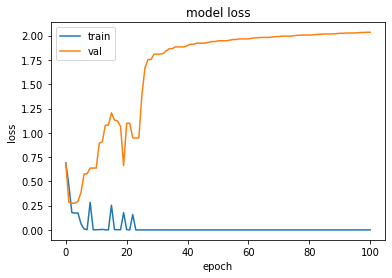

<Figure size 1080x720 with 0 Axes>

In [46]:
plt.plot(plot_points2)
plt.plot(plot_points)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.figure(figsize = (15,10))
plt.show()

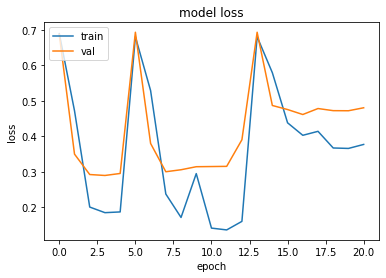

In [55]:
plt.plot(plot_points2)
plt.plot(plot_points)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()